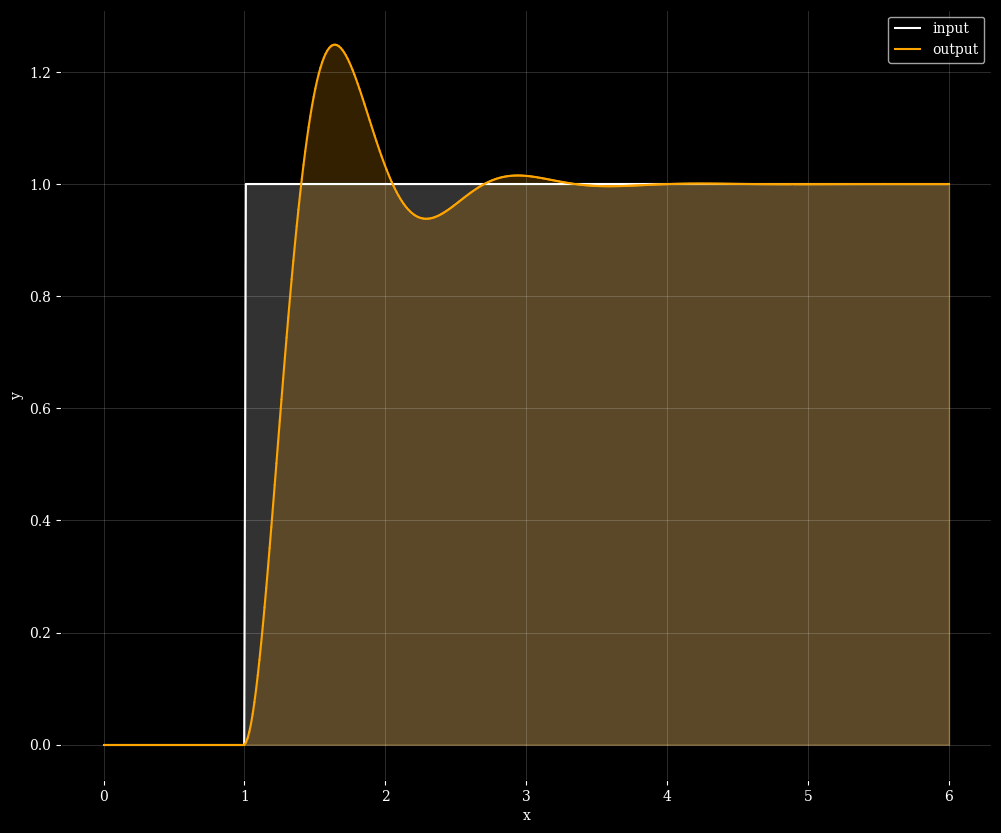

In [4]:
from numpy import *
import matplotlib.pyplot as plt
from plot_util import *

class SecondOrderDynamics:

    def __init__(self, f, zeta, r, x0):
        self._k1 = zeta / (pi * f)
        self._k2 = 1.0 / ((2*pi*f)**2)
        self._k3 = r * zeta / (2*pi*f)

        self._xp = x0
        self._y = x0
        self._dy = 0

    def update(self, x, dt = 0.01):
        dx = (x - self._xp) / dt
        self._xp = x
        self._y += self._dy * dt
        self._dy += dt * (x + self._k3 * dx - self._y - self._k1 * self._dy) / self._k2
        return self._y
    

f = 1
zeta = 0.4
r = 0

N = 500
t = linspace(0, 6, N)
x = heaviside(t - 1, 0.0)
dynamics = SecondOrderDynamics(f, zeta, r, 0.0)

mpl_setscheme()
fig, ax = get_figure(figsize=(12,10))

y = zeros_like(x)
y[0] = x[0]
for k, (xk, tk) in enumerate(zip(x[1:], t[1:])):
    y[k] = dynamics.update(xk)
y[-1] = y[-2]


lcin, fin = fillplot(ax, t, x, 0, 'white', 'white')
lcout, fout = fillplot(ax, t, y, 0, 'orange', 'orange')
lcout.set_label('output')
lcin.set_label('input')

ax.legend()
plt.show()